In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import cv2
%matplotlib inline

In [2]:
# Udacity driving data
DATA_DIR = '/Users/aa/Developer/courses/self_driving_carnd/P3_behavior_cloning/data/udacity-data'

# my data - 5 laps
DATA5 = '/Users/aa/Downloads/drive5'

# my data - manual mode (keyboard)
DATA6 = '/Users/aa/Downloads/drive6'

DRIVING_LOG = 'driving_log.csv'

In [3]:
coltypes = {'center': object,
         'left': object,
         'right': object,
         'steering': np.float64,
         'throttle': np.float64,
         'brake': np.float64,
         'speed': np.float64}

In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, DRIVING_LOG), 
                names=['center','left', 'right', 'steering', 'throttle', 'brake', 'speed'],
                dtype=coltypes,
                na_values='', 
                header=0)

df = df[1:]  # ignore first row (may be the header)
df.head(10)

center  \
1   IMG/center_2016_12_01_13_30_48_404.jpg   
2   IMG/center_2016_12_01_13_31_12_937.jpg   
3   IMG/center_2016_12_01_13_31_13_037.jpg   
4   IMG/center_2016_12_01_13_31_13_177.jpg   
5   IMG/center_2016_12_01_13_31_13_279.jpg   
6   IMG/center_2016_12_01_13_31_13_381.jpg   
7   IMG/center_2016_12_01_13_31_13_482.jpg   
8   IMG/center_2016_12_01_13_31_13_584.jpg   
9   IMG/center_2016_12_01_13_31_13_686.jpg   
10  IMG/center_2016_12_01_13_31_13_786.jpg   

                                     left  \
1    IMG/left_2016_12_01_13_30_48_404.jpg   
2    IMG/left_2016_12_01_13_31_12_937.jpg   
3    IMG/left_2016_12_01_13_31_13_037.jpg   
4    IMG/left_2016_12_01_13_31_13_177.jpg   
5    IMG/left_2016_12_01_13_31_13_279.jpg   
6    IMG/left_2016_12_01_13_31_13_381.jpg   
7    IMG/left_2016_12_01_13_31_13_482.jpg   
8    IMG/left_2016_12_01_13_31_13_584.jpg   
9    IMG/left_2016_12_01_13_31_13_686.jpg   
10   IMG/left_2016_12_01_13_31_13_786.jpg   

                                     right  steering  throttle  brake  \
1    IMG/right_2016_12_01_13_30_48_404.jpg       0.0       0.0    0.0   
2    IMG/right_2016_12_01_13_31_12_937.jpg       0.0       0.0    0.0   
3    IMG/right_2016_12_01_13_31_13_037.jpg       0.0       0.0    0.0   
4    IMG/right_2016_12_01_13_31_13_177.jpg       0.0       0.0    0.0   
5    IMG/right_2016_12_01_13_31_13_279.jpg       0.0       0.0    0.0   
6    IMG/right_2016_12_01_13_31_13_381.jpg       0.0       0.0    0.0   
7    IMG/right_2016_12_01_13_31_13_482.jpg       0.0       0.0    0.0   
8    IMG/right_2016_12_01_13_31_13_584.jpg       0.0       0.0    0.0   
9    IMG/right_2016_12_01_13_31_13_686.jpg       0.0       0.0    0.0   
10   IMG/right_2016_12_01_13_31_13_786.jpg       0.0       0.0    0.0   

        speed  
1   21.879630  
2    1.453011  
3    1.438419  
4    1.418236  
5    1.403993  
6    1.389892  
7    1.375934  
8    1.362115  
9    1.348435  
10   1.334892

In [5]:
len(df)

8035

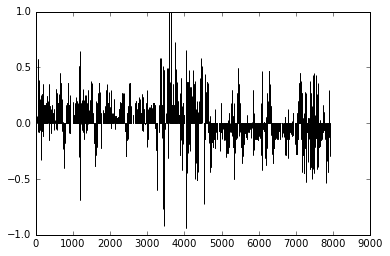

In [6]:
## Plot the steering angles
plt.bar(df.steering.index, df.steering.values, width=0.01)
plt.show()

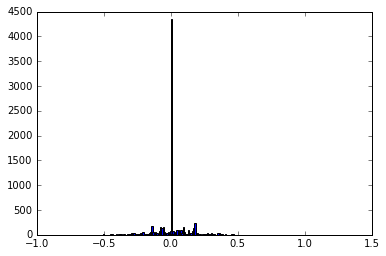

In [7]:
### Plot Histogram
histo = df.steering.value_counts()
plt.bar(histo.index, histo.values, width=0.01)
plt.show()

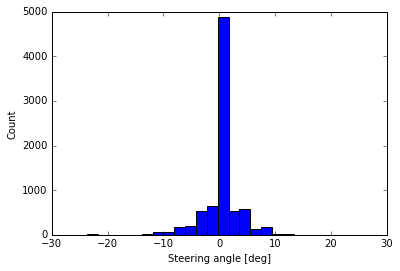

In [8]:
# Plot another histogram
steering = df['steering']
plt.hist(steering*25, bins=25)
plt.xlabel('Steering angle [deg]')
plt.ylabel('Count')
plt.show()

In [9]:
df['steering'].describe()

count    8035.000000
mean        0.004070
std         0.128848
min        -0.942695
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steering, dtype: float64

It is clear (from the Udacity driving data) that most of the samples are driving straight (angle=0), and there are several more images with LEFT (angle < 0) steering than RIGHT (angle > 0).
The variation in angles also means that there are some very sharp turns (angles > 8-10 degrees). 

Presumably, we will have to smoothen out some of the sharp turns.

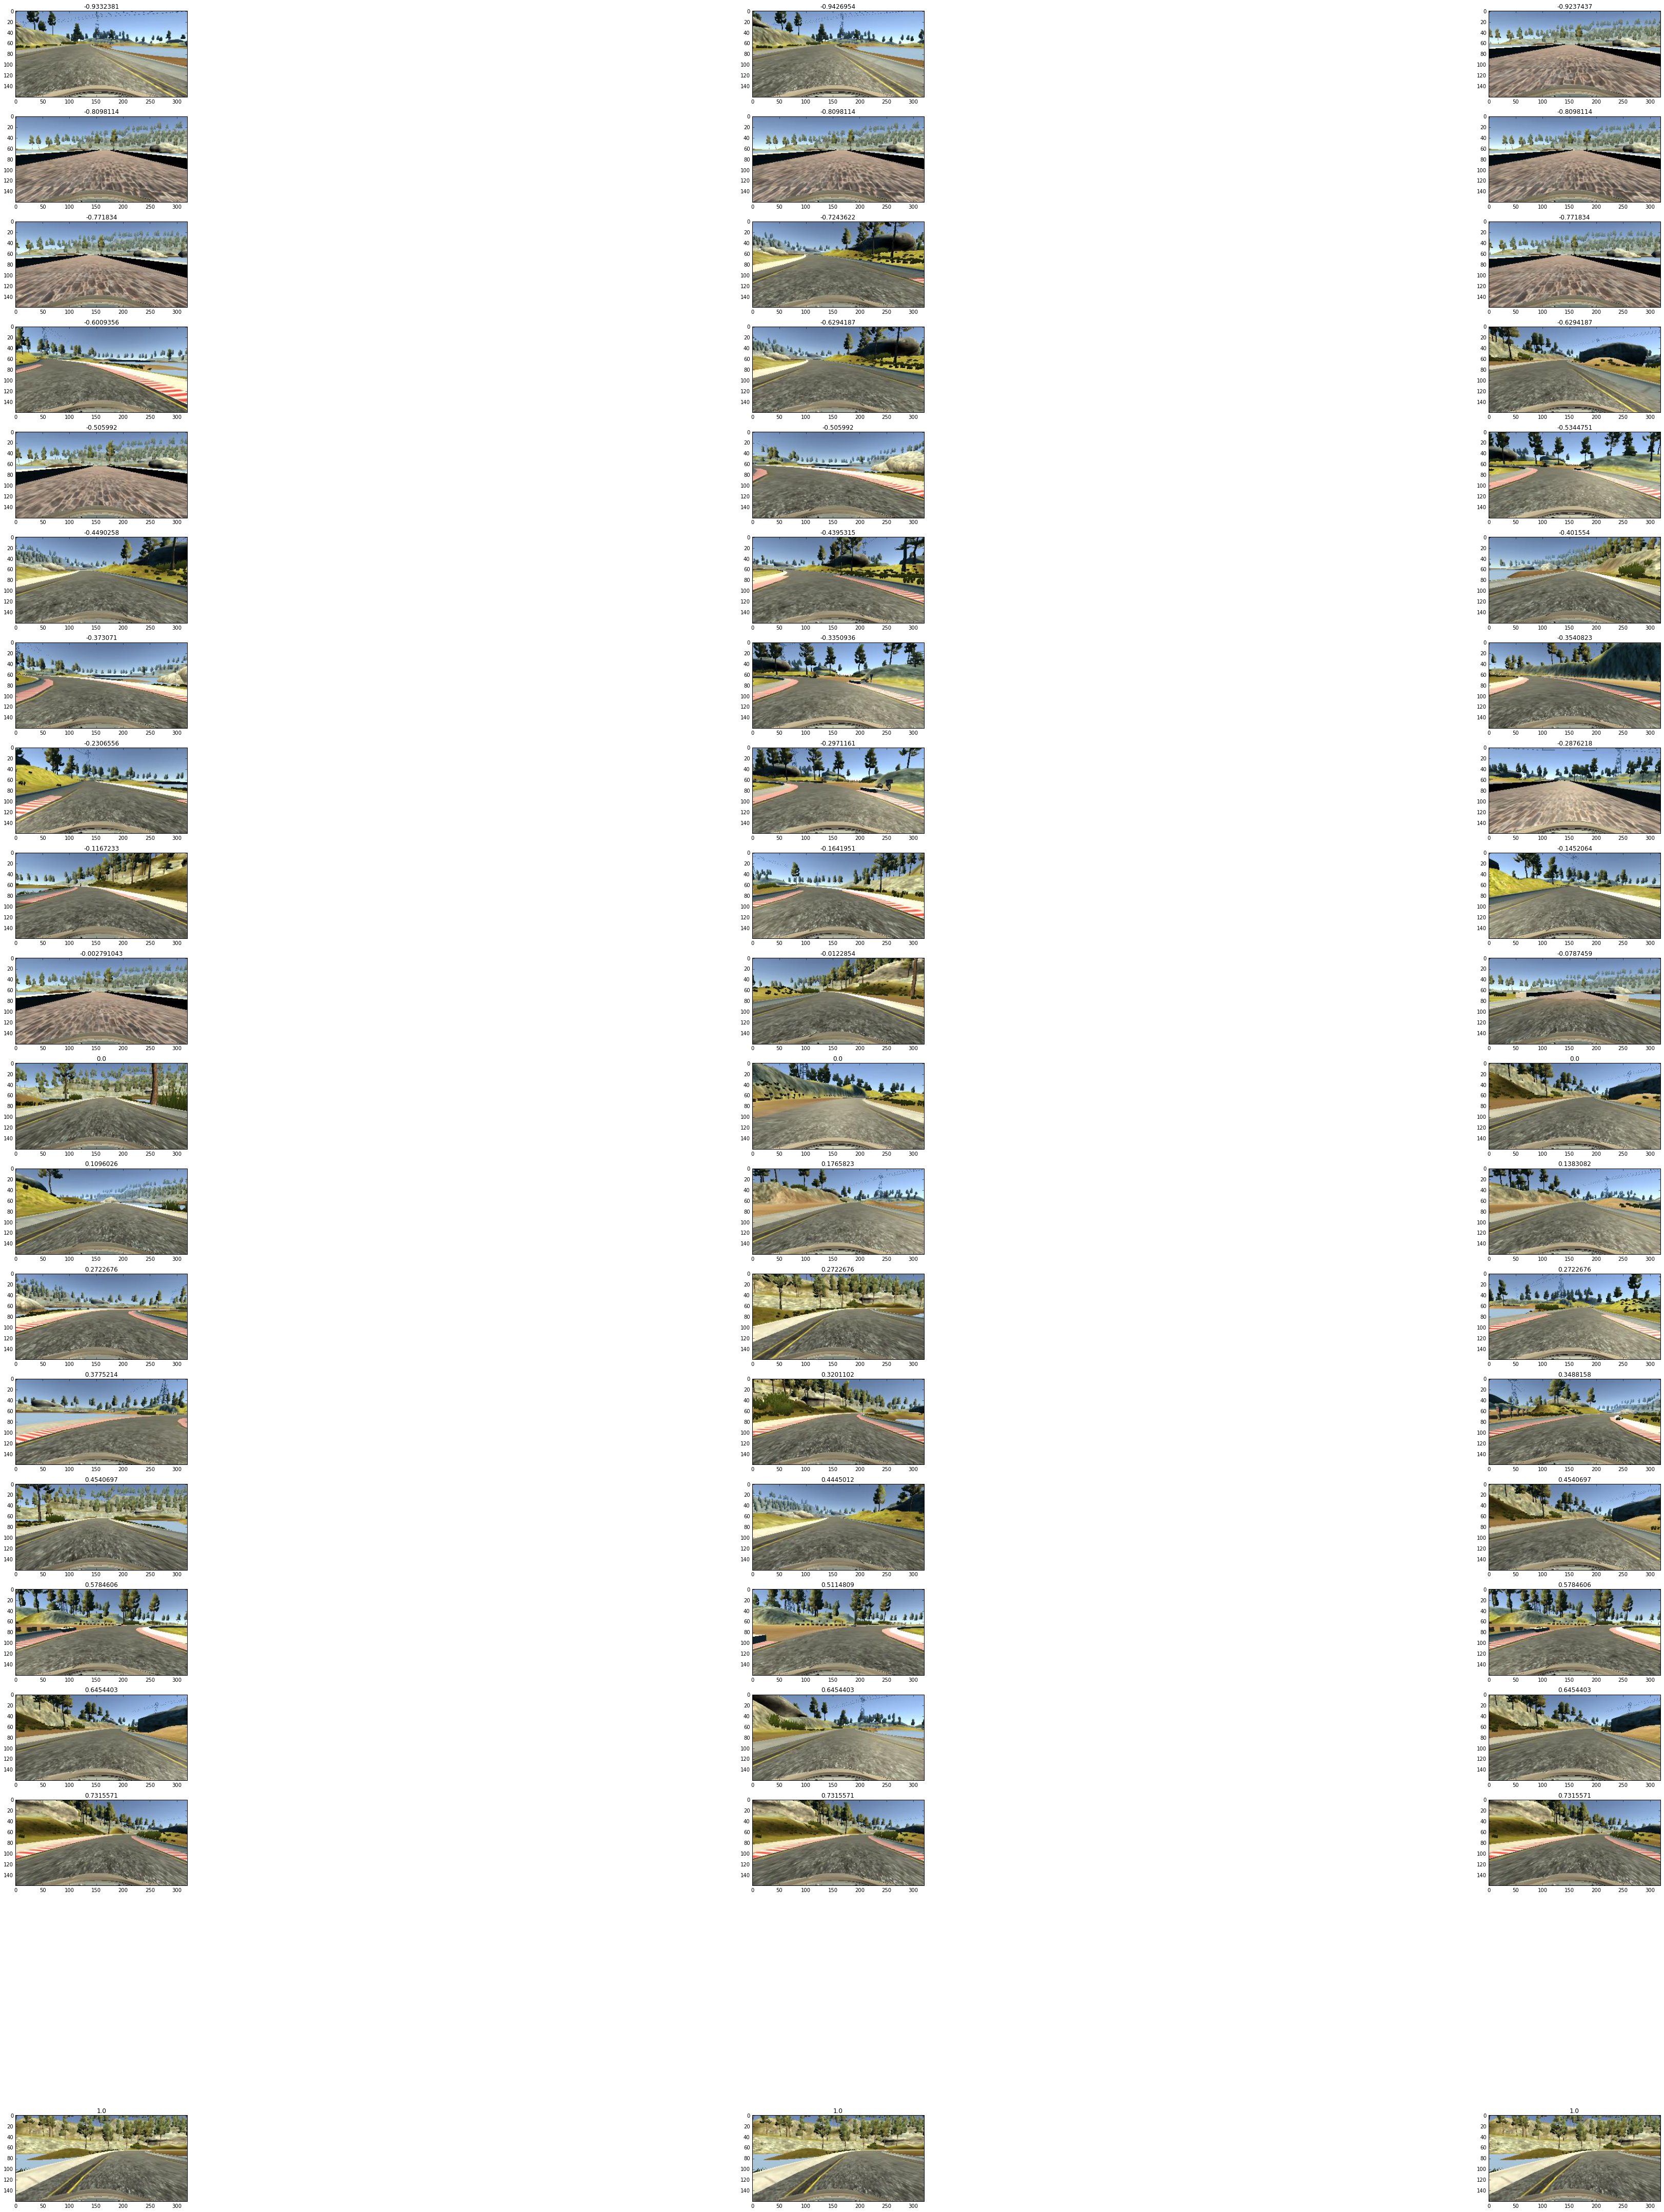

In [10]:
## Show some random images for each angle
fig = plt.figure(figsize=(60, 60))
gs = gridspec.GridSpec(21, 3)

# Plot one of the 0 values

for i in range(21):
    panel = df.loc[df.steering >= -1 + (i/10)]
    ans = panel.loc[panel.steering < -1 + ((i+1)/10)]
    #print (ans.steering.iloc[0])
    if len(ans):
        for j in range(3):
            idx = np.random.choice(ans.index)
            img = cv2.imread(os.path.join(DATA_DIR, ans.center[idx].strip()))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax = fig.add_subplot(gs[(i*3)+j])
            ax.set_title(ans.steering[idx])
            ax.imshow(img)

gs.tight_layout(fig)
plt.show()

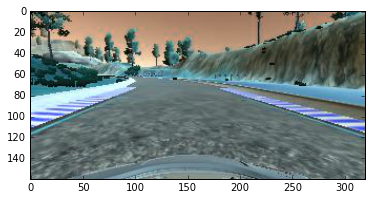

In [11]:
# show a random image

rr = np.random.choice(len(df))
img = cv2.imread(os.path.join(DATA_DIR, df.center[rr].strip()))
plt.imshow(img)

In [12]:
print(img.shape)

(160, 320, 3)


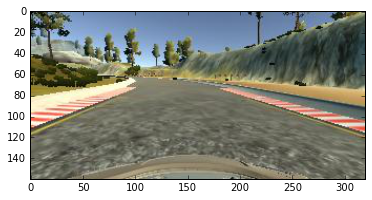

In [13]:
# convert from  BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
def roi(image):
    ''' Retain only useful info -- remove distracting (top) and width
    '''
    img = image[60:120, 40:280, :]
    return img


(60, 240, 3)


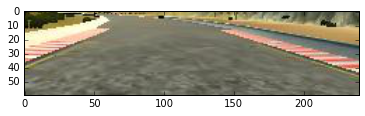

In [15]:
p = roi(img)
plt.imshow(p)
print(p.shape)

In [16]:
def roi2(image):
    img = image[60:140, 30:280, :]
    return img

(80, 250, 3)


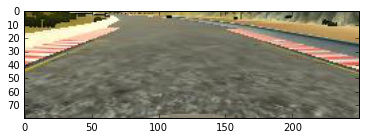

In [17]:
p = roi2(img)
plt.imshow(p)
print(p.shape)

In [18]:
def img_pre_process(img):
    """
    Processes the image and returns it
    :param img: The image to be processed
    :param draw: If the images should be drawn for debug
    :return: Returns the processed image
    """
    # Remove the unwanted top scene and retain only the track
    roi = img[:,:,:]    
    norm = (roi / 255.) - .5
    return norm

In [19]:
img_pre = img_pre_process(img)
print(img_pre.shape)

(160, 320, 3)


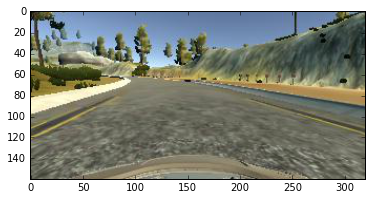

In [12]:
plt.imshow(img)

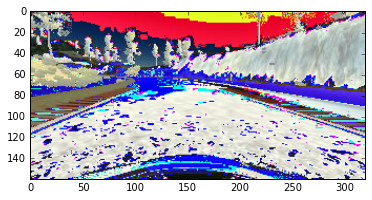

In [20]:
plt.imshow(img_pre)

In [21]:
DATA_DIR10 = '/Users/aa/Downloads/drive10'

In [22]:

df10 = pd.read_csv(os.path.join(DATA_DIR10, DRIVING_LOG), 
                   names=['center','left', 'right', 'steering', 'throttle', 'brake', 'speed'],
                  dtype=coltypes,
                  na_values='')
df10['left'] = df10['left'].apply(lambda x: str(x))
df10['right'] = df10['right'].apply(lambda x: str(x))

In [23]:
df10.head()

center left right  steering  \
0  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
1  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
2  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
3  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
4  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   

   throttle  brake     speed  
0       0.0    0.0  0.000054  
1       0.0    0.0  0.000054  
2       0.0    0.0  0.000055  
3       0.0    0.0  0.000055  
4       0.0    0.0  0.000056

### NOTE:  Missing Right/Left images

Some driving log files only have CENTER Images -- this is from the Beta Simulator (the one what allows

In [14]:
s = df10.iloc[5]['left']
print(s)
print(type(s))

nan
<class 'str'>


In [15]:
df10.dtypes

center       object
left         object
right        object
steering    float64
throttle    float64
brake       float64
speed       float64
dtype: object

In [94]:
df10['left'] = df10['left'].apply(lambda x: str(x))
df10['right'] = df10['right'].apply(lambda x: str(x))

In [16]:
df10.head()

center left right  steering  \
0  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
1  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
2  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
3  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   
4  /Users/aa/Downloads/drive10/IMG/center_2017_02...  nan   nan       0.0   

   throttle  brake     speed  
0       0.0    0.0  0.000054  
1       0.0    0.0  0.000054  
2       0.0    0.0  0.000055  
3       0.0    0.0  0.000055  
4       0.0    0.0  0.000056

In [17]:
df10.iloc[5]

center      /Users/aa/Downloads/drive10/IMG/center_2017_02...
left                                                      nan
right                                                     nan
steering                                                    0
throttle                                                    0
brake                                                       0
speed                                              5.3869e-05
Name: 5, dtype: object

In [97]:
s = df10.iloc[5]['left']
print(s)
print(type(s))

nan
<class 'str'>


In [84]:
c = df10.iloc[5]['center']
print(c)
print(type(c))

/Users/aa/Downloads/drive10/IMG/center_2017_02_06_20_58_19_307.jpg
<class 'str'>


In [101]:
img_file = df10.iloc[25]['left']
print(img_file)
print(type(img_file))
if img_file != '' and img_file != 'nan' and img_file != 'NaN' and img_file[0] != '/':
    img_file.strip()
    img_file = os.path.join(DATA_DIR10, img_file)

nan
<class 'str'>


In [99]:
print(img_file)

/Users/aa/Downloads/drive10/IMG/center_2017_02_06_20_58_20_438.jpg


In [100]:
im10 = cv2.imread(img_file)
print(im10.shape)

(160, 320, 3)


In [18]:
len(df)

8035

In [19]:
len(df10)

22587

In [22]:
df10 = df10.append(df)

In [23]:
len(df10)

30622

In [29]:
BS = 128
bs = BS * (len(df10) // BS)
bs

30592

In [30]:
df10['steering'].describe()

/Users/aa/Developer/miniconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    16070.000000
mean        -0.009167
std          0.233682
min         -1.885391
25%               NaN
50%               NaN
75%               NaN
max          2.000000
Name: steering, dtype: float64